In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pupil_apriltags import Detector, Detection
import cv2

In [2]:
camera_matrix = np.array([[1.95512684e+03, 0.00000000e+00, 9.99979035e+02],
       [0.00000000e+00, 1.96894288e+03, 7.03714795e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [3]:
distortion_coeffs = np.array([[ 4.72405034e-02, -1.36893654e+00, -4.76959930e-03,
        -1.47286807e-03,  5.14401528e+00]])

In [4]:
img = cv2.imread("tags/alltags_lit_noauto.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

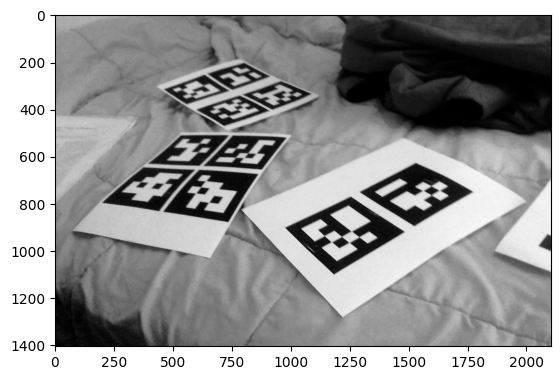

In [5]:
plt.imshow(img_gray, cmap="gray")

In [6]:
at_detector = Detector(
   families="tag25h9",
   nthreads=1,
   quad_decimate=1.0,
   quad_sigma=0.0,
   refine_edges=1,
   decode_sharpening=0.25,
   debug=0
)

In [7]:
output = at_detector.detect(img_gray,
   estimate_tag_pose=True,
   camera_params=[camera_matrix[0, 0], camera_matrix[1, 1], camera_matrix[0, 2], camera_matrix[1, 2]],
   tag_size = 0.1)

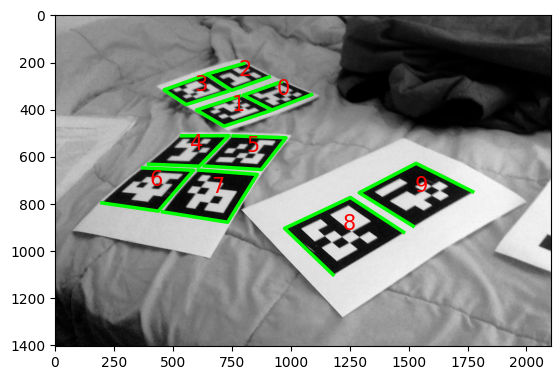

In [8]:
plt.imshow(img_gray, cmap="gray")
for det in output:
    curr_corners = det.corners
    plt.plot(curr_corners[:,0], curr_corners[:,1], color="lime", linewidth=2.5)
    plt.text(det.center[0], det.center[1], f"{det.tag_id}", color="red", size=15)

In [9]:
detection_0 = output[0]
pose_R = detection_0.pose_R
pose_t = detection_0.pose_t
transform = np.zeros((4, 4))
transform[:3,:3] = pose_R
transform[:3,[3]] = pose_t
transform[3, 3] = 1


In [92]:
transform @ np.array([0, 0, 0, 1])

array([-0.0280883 , -0.17585549,  0.94573037,  1.        ])

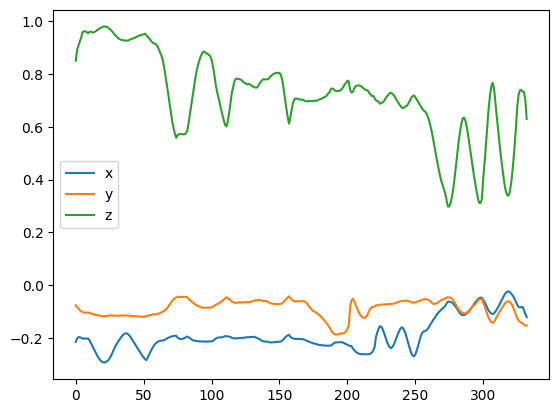

In [36]:
data = np.loadtxt("data/t_poses.txt")
x, y, z = data[:,0], data[:,1], data[:,2]
plt.plot(x, label="x")
plt.plot(y, label="y")
plt.plot(z, label="z")
plt.legend()

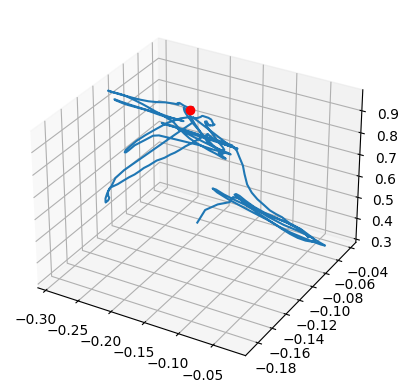

In [43]:
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
line, = ax.plot(x, y, z)
point, = ax.plot(x[0], y[0], z[0], 'ro')  # Initial point

plt.show()